In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('job.csv')

In [3]:
df

,job_title,company_name,location,start_date,ctc,experience,posted
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-1 years,3 days ago
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,1 week ago
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,3 days ago\n\n\nBe an early applicant
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-5 years,3 weeks ago
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,"₹ 2,40,000 - 3,60,000",0-2 years,2 weeks ago
...,...,...,...,...,...,...,...
4591,PHP Developer,Unnati,Gurgaon,Starts Immediately,Competitive salary,3-5 years,3 weeks ago
4592,Software Developer,Unnati,Gurgaon,Starts Immediately,Competitive salary,2-10 years,3 weeks ago
4593,Social Media Marketing Manager,Unnati,Delhi,Starts Immediately,Competitive salary,3-4 years,3 weeks ago
4594,Graphic Designer,Unnati,Gurgaon,Starts Immediately,Competitive salary,3-6 years,3 weeks ago


+ job_title 직업명
+ company_name 회사명
+ location 회사 위치
+ start_date 업무 시작일
+ ctc 임금
+ experience 경력
+ posted 공고일

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     4596 non-null   object
 1   company_name  4596 non-null   object
 2   location      4596 non-null   object
 3   start_date    4596 non-null   object
 4   ctc           4596 non-null   object
 5   experience    4596 non-null   object
 6   posted        4596 non-null   object
dtypes: object(7)
memory usage: 251.5+ KB


In [5]:
df.describe()

,job_title,company_name,location,start_date,ctc,experience,posted
count,4596,4596,4596,4596,4596,4596,4596
unique,1767,2876,583,1,487,28,26
top,Business Development Executive,A1 Advance,Work from home,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-2 years,3 weeks ago
freq,290,141,791,4596,520,2730,1326


In [6]:
df.isnull().sum()

job_title       0
company_name    0
location        0
start_date      0
ctc             0
experience      0
posted          0
dtype: int64

In [7]:
df.duplicated().sum()

94

In [8]:
df = df.drop_duplicates()

+ 중복되는 행 제거

## 1) csv 파일을 Pandas DataFrame으로 받고, 회사가 많이 있는 도시를 내림차순으로 정렬해서 plotting하세요.

In [9]:
# TODO: 복수로 표기된 엔트리 처리

In [10]:
df['location'].value_counts()

Work from home                                                                                                                                                              788
Mumbai                                                                                                                                                                      576
Bangalore                                                                                                                                                                   445
Delhi                                                                                                                                                                       368
Noida                                                                                                                                                                       234
                                                                                                                        

In [11]:
def split_location(data, location_column='location'):
    new_rows = []

    for index, row in data.iterrows():
        locations = row[location_column].split(', ')
        if len(locations) > 1:
            for location in locations:
                new_row = row.copy()
                new_row[location_column] = location
                new_rows.append(new_row)

    data = pd.concat([data, pd.DataFrame(new_rows)], ignore_index=True)
    data = data[data[location_column].str.contains(', ') == False]

    return data

+ 여러 위치 한꺼번에 쓰여 있는 한 개의 행 -> 한 위치만 포함하는 여러 개의 행으로 분할

In [12]:
sum(df['location'].str.count(', '))

2790

+ 모든 행에 포함된 총 쉼표의 개수 (split_location 함수 적용 시 추가돼야 하는 행의 개수)

In [13]:
df = split_location(df)

In [14]:
df

,job_title,company_name,location,start_date,ctc,experience,posted
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-1 years,3 days ago
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,1 week ago
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,3 days ago\n\n\nBe an early applicant
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-5 years,3 weeks ago
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,"₹ 2,40,000 - 3,60,000",0-2 years,2 weeks ago
...,...,...,...,...,...,...,...
7813,Corporate Sales Executive,Itech Ecommerce Company,Ahmedabad,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-2 years,3 weeks ago
7814,Datastage Operations,Teradata,Pune,Starts Immediately,Competitive salary,3-5 years,1 week ago
7815,Datastage Operations,Teradata,Navi Mumbai,Starts Immediately,Competitive salary,3-5 years,1 week ago
7816,Applied Scientist,Amazon,Bangalore,Starts Immediately,Competitive salary,3-5 years,1 week ago


In [15]:
df['location'].value_counts()

Work from home    788
Mumbai            716
Bangalore         558
Delhi             524
Noida             330
                 ... 
Alandi              1
Mandoli             1
Thoubal             1
Yalahanka           1
Panaji              1
Name: location, Length: 669, dtype: int64

In [16]:
# TODO: 상위 20개의 도시에 대해서만 plotting

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
x = np.arange(1, 22)

In [19]:
location_counts = df['location'].value_counts().iloc[1:22]

+ 상위 2위부터 21위까지 회사 위치
+ 상위 1위인 'Work from home'은 제외

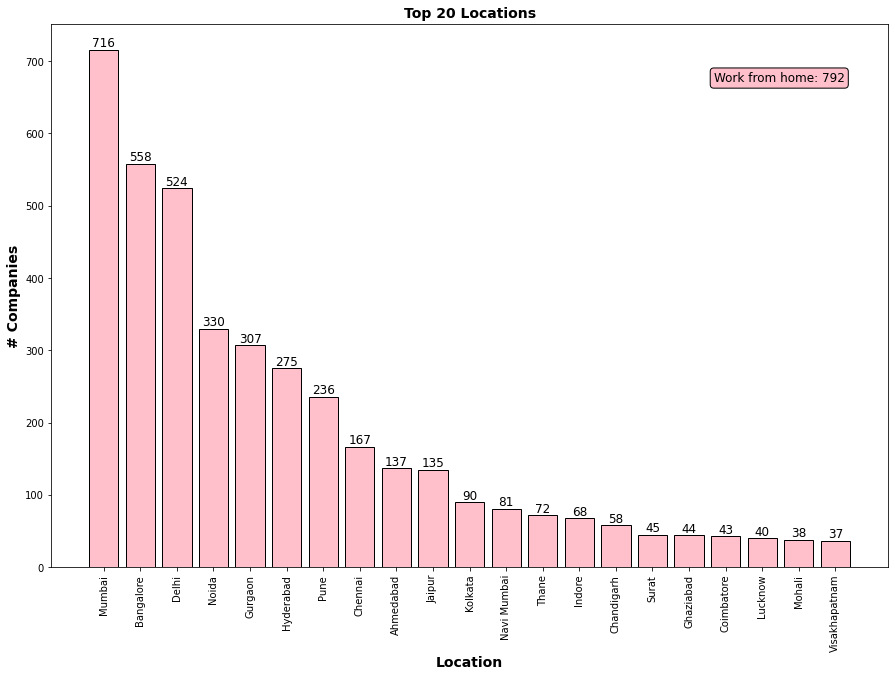

In [20]:
plt.figure(figsize=(15, 10))
bars = plt.bar(x, location_counts.values, color='pink', edgecolor='black')
plt.xticks(x, location_counts.index, rotation=90)
plt.xlabel('Location', fontsize=14, fontweight='bold')
plt.ylabel('# Companies', fontsize=14, fontweight='bold')
plt.title('Top 20 Locations', fontsize=14, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % height, ha='center', va='bottom', size=12)
    
plt.text(0.87, 0.9, 'Work from home: 792', ha='center', va='center', size=12, transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='pink'))
    
plt.show()

+ 제외한 Work from home은 따로 위에 표기
+ Work from home 제외 상위 20위 도시 plotting

## 2) 평균 임금 best 10 & worst 10 직종 출력

In [21]:
# TODO: 직종 별로 평균 임금을 계산하여 출력합니다.

In [22]:
df

,job_title,company_name,location,start_date,ctc,experience,posted
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-1 years,3 days ago
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,1 week ago
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,3 days ago\n\n\nBe an early applicant
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-5 years,3 weeks ago
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,"₹ 2,40,000 - 3,60,000",0-2 years,2 weeks ago
...,...,...,...,...,...,...,...
7813,Corporate Sales Executive,Itech Ecommerce Company,Ahmedabad,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-2 years,3 weeks ago
7814,Datastage Operations,Teradata,Pune,Starts Immediately,Competitive salary,3-5 years,1 week ago
7815,Datastage Operations,Teradata,Navi Mumbai,Starts Immediately,Competitive salary,3-5 years,1 week ago
7816,Applied Scientist,Amazon,Bangalore,Starts Immediately,Competitive salary,3-5 years,1 week ago


In [23]:
df['ctc'].value_counts()

₹ 4,00,000 - 6,00,000     1017
₹ 2,00,000 - 3,00,000      687
₹ 4,00,000 - 7,00,000      386
₹ 2,00,000                 316
₹ 2,00,000 - 2,50,000      297
                          ... 
₹ 8,50,000                   1
₹ 7,00,000 - 13,00,000       1
₹ 2,50,000 - 4,75,000        1
₹ 4,60,000 - 6,00,000        1
₹ 3,20,000 - 3,20,001        1
Name: ctc, Length: 487, dtype: int64

In [24]:
df[df['ctc'] == 'Competitive salary']

,job_title,company_name,location,start_date,ctc,experience,posted
3971,Java Developer,Leaguesol Private Limited,Hyderabad,Starts Immediately,Competitive salary,4-6 years,1 day ago
3972,Java Developer,Leaguesol Private Limited,Bangalore,Starts Immediately,Competitive salary,4-6 years,1 day ago
3977,Accountant,Freshleaf Teas,Ludhiana,Starts Immediately,Competitive salary,0-1 years,1 day ago
3978,Graphic Designer,Freshleaf Teas,Ludhiana,Starts Immediately,Competitive salary,0-1 years,1 day ago
3990,Operations Manager,R3 Consultant,Mumbai,Starts Immediately,Competitive salary,4-6 years,2 days ago
...,...,...,...,...,...,...,...
4501,Digital Marketing Manager,Unnati,Delhi,Starts Immediately,Competitive salary,3-7 years,3 weeks ago
7814,Datastage Operations,Teradata,Pune,Starts Immediately,Competitive salary,3-5 years,1 week ago
7815,Datastage Operations,Teradata,Navi Mumbai,Starts Immediately,Competitive salary,3-5 years,1 week ago
7816,Applied Scientist,Amazon,Bangalore,Starts Immediately,Competitive salary,3-5 years,1 week ago


In [25]:
jobs_cs = df[df['ctc'] == 'Competitive salary'].job_title

In [26]:
for job in jobs_cs:
    df['ctc'] = df['ctc'].replace('Competitive salary', df[df['job_title'] == job]['ctc'].mode()[0])

+ 'ctc'로 Competitive salary를 가진 행은 같은 직종의 'ctc' 최빈값으로 대체

In [27]:
df[df['ctc'] == 'Competitive salary']

,job_title,company_name,location,start_date,ctc,experience,posted


In [28]:
df.iloc[3989]

job_title       Customer Success Associate
company_name                 Vertex Cosmos
location                            Jaipur
start_date              Starts Immediately
ctc                  ₹ 3,00,000 - 3,40,000
experience                       0-2 years
posted                          3 days ago
Name: 4515, dtype: object

+ 'ctc'가 Competitive salary인 행이 모두 대체된 것 확인

In [29]:
from currency_converter import CurrencyConverter

c = CurrencyConverter()

In [30]:
def convert_ctc(money):
    if '₹' in money:
        wages = money.replace('₹ ', '').replace(',', '').split(' - ')
        if len(wages) == 2:
            avg = (float(wages[0]) + float(wages[1])) / 2
            return avg
        elif len(wages) == 1:
            avg = float(wages[0])
        return c.convert(avg, 'INR', 'USD')
    elif 'AED' in money:
        return None

+ 'ctc'에서 '₹' 글자 제거
+ 'ctc'로 범위값을 가진 행에 대해 최대 & 최소 임금의 평균으로 대체
+ AED로 표기된 행은 None으로 대체

In [31]:
df['new_ctc'] = df['ctc'].apply(convert_ctc)

In [32]:
df

,job_title,company_name,location,start_date,ctc,experience,posted,new_ctc
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-1 years,3 days ago,250000.0
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,1 week ago,325000.0
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,3 days ago\n\n\nBe an early applicant,325000.0
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-5 years,3 weeks ago,300000.0
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,"₹ 2,40,000 - 3,60,000",0-2 years,2 weeks ago,300000.0
...,...,...,...,...,...,...,...,...
7813,Corporate Sales Executive,Itech Ecommerce Company,Ahmedabad,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-2 years,3 weeks ago,250000.0
7814,Datastage Operations,Teradata,Pune,Starts Immediately,"₹ 2,00,000 - 3,00,000",3-5 years,1 week ago,250000.0
7815,Datastage Operations,Teradata,Navi Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",3-5 years,1 week ago,250000.0
7816,Applied Scientist,Amazon,Bangalore,Starts Immediately,"₹ 2,00,000 - 3,00,000",3-5 years,1 week ago,250000.0


In [33]:
temp_df = df[df['new_ctc'].isnull() == False]

+ 'new_ctc'가 None인 행 제거된 임시 DataFrame 생성

In [34]:
mean_ctc = temp_df.groupby('job_title')['new_ctc'].mean()
mean_ctc

job_title
.NET Developer                                 360000.00000
2D Animator                                    220000.00000
3D Animator                                    250000.00000
3D Animator In Blender (Medical Animations)    350000.00000
3D Designer                                    350000.00000
                                                   ...     
WordPress Developer                            303818.28206
Workshop Trainer                               225000.00000
YouTube Influencer                             375000.00000
Zonal Assistant Manager- Logistics             380000.00000
iOS App Developer                              192001.10266
Name: new_ctc, Length: 1764, dtype: float64

In [35]:
top_10 = mean_ctc.sort_values(ascending=False).head(10)
top_10

job_title
Azure Solutions Architect Expert     3.500000e+06
Full Stack ( React + Python )        2.500000e+06
Senior Architect                     2.260000e+06
AVP - HR                             1.700000e+06
Senior Web Developer                 1.638000e+06
Chief Monetization Officer           1.500000e+06
Senior DevOps Engineer               1.400000e+06
Sales Executive - Enterprise SaaS    1.350000e+06
Senior Backend Developer             1.325000e+06
Network Engineer                     1.258100e+06
Name: new_ctc, dtype: float64

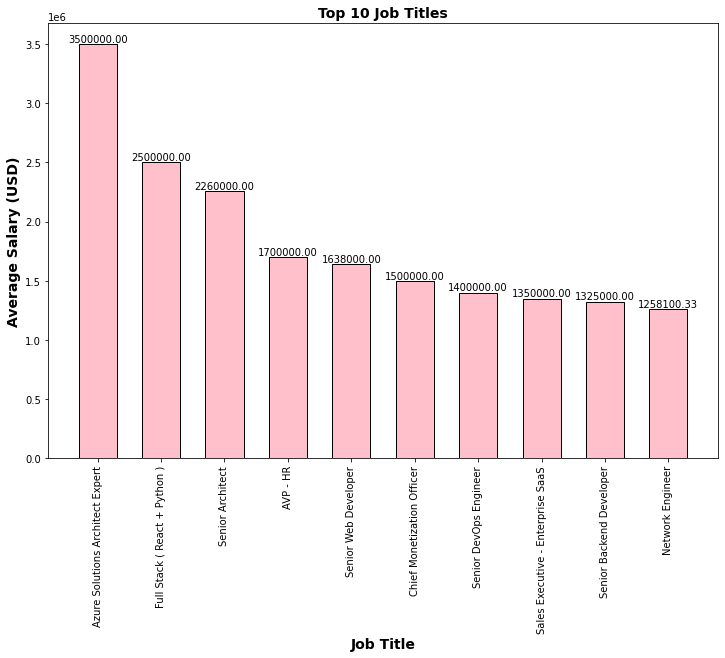

In [36]:
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10.index, top_10.values, color='pink', edgecolor='black', width=0.6)
plt.xticks(rotation=90)
plt.xlabel('Job Title', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Top 10 Job Titles', fontsize=14, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%.2f' % height, ha='center', va='bottom', size=10)
    
plt.show()

+ 평균 임금이 높은 상위 10개 직종

In [37]:
bottom_10 = mean_ctc.sort_values(ascending=False).tail(10)
bottom_10

job_title
Shopify And Wordpress Developer                    2401.323192
Social Media Account Handler                       2401.323192
Tellercaller                                       2401.323192
Content Developer (Professional Community)         2401.323192
ReachOut Communication Executive                   2401.323192
RESERVATION EXECUTIVE MANAGER                      2401.323192
Quality Engineer                                   2401.323192
Telemarketer                                       2401.323192
Commissioning Engineer                             2401.323192
Experience Curator - Travel And Tourism (Sales)    2401.323192
Name: new_ctc, dtype: float64

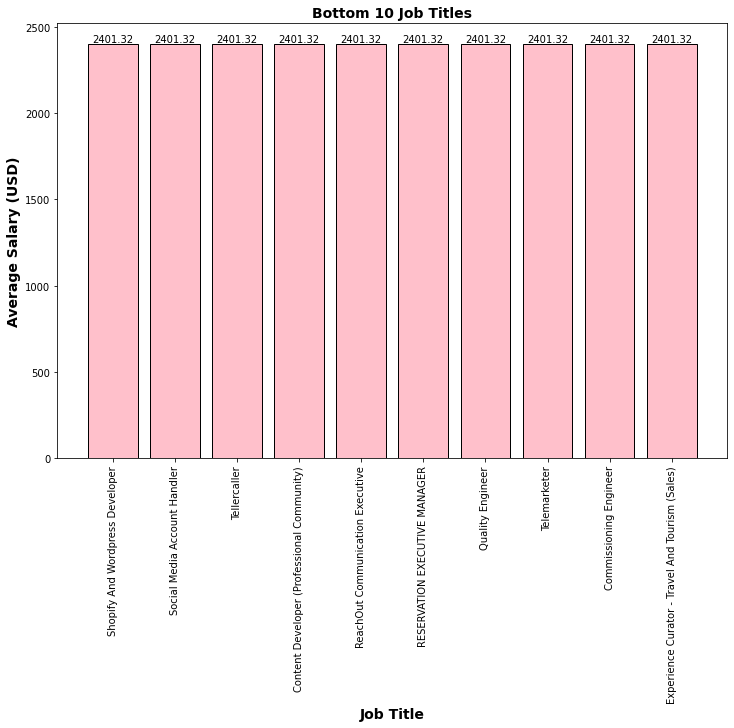

In [38]:
plt.figure(figsize=(12, 8))
bars = plt.bar(bottom_10.index, bottom_10.values, color='pink', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Job Title', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Bottom 10 Job Titles', fontsize=14, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%.2f' % height, ha='center', va='bottom', size=10)

plt.show()

+ 평균 임금이 낮은 하위 10개 직종

## 3) 경력 별 평균 임금 출력

In [39]:
# TODO: 경력 별로 평균 임금을 계산하여 출력

In [40]:
df['experience'].value_counts()

0-2 years      3572
0-5 years      2021
0-1 years       795
1-3 years       291
4-6 years       148
0-3 years        72
1-2 years        71
2-5 years        52
1-5 years        45
3-5 years        40
0 years          37
7-10 years       34
4-5 years        19
2-4 years        16
1 year           15
1-4 years        13
0-4 years        11
2 years          10
2-3 years         9
10-15 years       8
4 years           3
3-4 years         3
3 years           2
6-10 years        1
5-7 years         1
2-10 years        1
3-7 years         1
3-6 years         1
Name: experience, dtype: int64

In [41]:
mean_ctc = df.groupby('experience')['new_ctc'].mean()
mean_ctc

experience
0 years        2.741182e+05
0-1 years      4.976135e+05
0-2 years      2.373022e+05
0-3 years      3.380667e+05
0-4 years      3.253182e+05
0-5 years      5.087813e+05
1 year         3.440000e+05
1-2 years      3.021410e+05
1-3 years      4.372022e+05
1-4 years      4.411538e+05
1-5 years      4.221023e+05
10-15 years    1.237500e+06
2 years        4.972007e+05
2-10 years     2.500000e+05
2-3 years      3.742500e+05
2-4 years      3.129502e+05
2-5 years      4.438654e+05
3 years        6.000000e+05
3-4 years      1.688679e+05
3-5 years      3.287751e+05
3-6 years      2.500000e+05
3-7 years      2.500000e+05
4 years        1.000000e+06
4-5 years      3.576844e+05
4-6 years      6.728243e+05
5-7 years      2.500000e+05
6-10 years     2.500000e+05
7-10 years     9.811765e+05
Name: new_ctc, dtype: float64

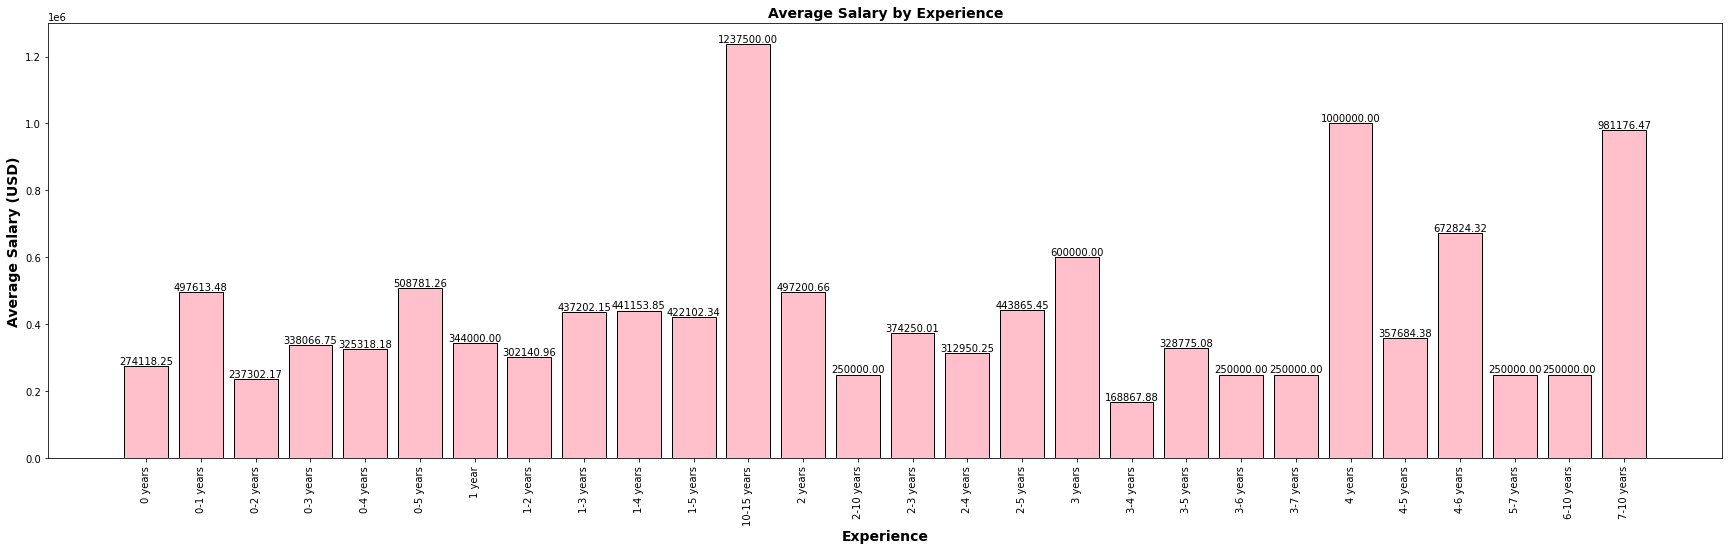

In [42]:
plt.figure(figsize=(30, 8))
plt.bar(mean_ctc.index, mean_ctc.values, color='pink', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Experience', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience', fontsize=14, fontweight='bold')

for i, v in enumerate(mean_ctc.values):
    plt.text(i, v, '%.2f' % v, ha='center', va='bottom', size=10)

plt.show()

In [ ]:
# TODO: csv parsing 오류 처리 (e.g., "Be an early applicant" 등)

In [43]:
df

,job_title,company_name,location,start_date,ctc,experience,posted,new_ctc
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-1 years,3 days ago,250000.0
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,1 week ago,325000.0
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,3 days ago\n\n\nBe an early applicant,325000.0
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-5 years,3 weeks ago,300000.0
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,"₹ 2,40,000 - 3,60,000",0-2 years,2 weeks ago,300000.0
...,...,...,...,...,...,...,...,...
7813,Corporate Sales Executive,Itech Ecommerce Company,Ahmedabad,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-2 years,3 weeks ago,250000.0
7814,Datastage Operations,Teradata,Pune,Starts Immediately,"₹ 2,00,000 - 3,00,000",3-5 years,1 week ago,250000.0
7815,Datastage Operations,Teradata,Navi Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",3-5 years,1 week ago,250000.0
7816,Applied Scientist,Amazon,Bangalore,Starts Immediately,"₹ 2,00,000 - 3,00,000",3-5 years,1 week ago,250000.0


In [44]:
df['start_date'].value_counts()

Starts Immediately    7292
Name: start_date, dtype: int64

In [45]:
df['start_date'] = df['start_date'].apply(lambda date: date.replace(' ', ' '))
df

,job_title,company_name,location,start_date,ctc,experience,posted,new_ctc
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-1 years,3 days ago,250000.0
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,1 week ago,325000.0
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,3 days ago\n\n\nBe an early applicant,325000.0
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-5 years,3 weeks ago,300000.0
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,"₹ 2,40,000 - 3,60,000",0-2 years,2 weeks ago,300000.0
...,...,...,...,...,...,...,...,...
7813,Corporate Sales Executive,Itech Ecommerce Company,Ahmedabad,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-2 years,3 weeks ago,250000.0
7814,Datastage Operations,Teradata,Pune,Starts Immediately,"₹ 2,00,000 - 3,00,000",3-5 years,1 week ago,250000.0
7815,Datastage Operations,Teradata,Navi Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",3-5 years,1 week ago,250000.0
7816,Applied Scientist,Amazon,Bangalore,Starts Immediately,"₹ 2,00,000 - 3,00,000",3-5 years,1 week ago,250000.0


+ 'start_date'에서 ' ' 제거 (nbsp)

In [46]:
df['posted'].unique()

array(['3 days ago', '1 week ago',
       '3 days ago\n\n\nBe an early applicant', '3 weeks ago',
       '2 weeks ago', '1 day ago\n\n\nBe an early applicant',
       '4 days ago', '2 days ago', '6 days ago', 'Few hours ago', 'Today',
       '1 day ago', '5 days ago', 'Just now\n\n\nBe an early applicant',
       'Few hours ago\n\n\nBe an early applicant',
       'Today\n\n\nBe an early applicant',
       '2 days ago\n\n\nBe an early applicant',
       '5 days ago\n\n\nBe an early applicant',
       '4 days ago\n\n\nBe an early applicant',
       '6 days ago\n\n\nBe an early applicant',
       '1 week ago\n\n\nBe an early applicant', '7 days ago',
       '7 days ago\n\n\nBe an early applicant',
       '3 weeks ago\n\n\nBe an early applicant',
       '2 weeks ago\n\n\nBe an early applicant', 'Just now'], dtype=object)

In [47]:
df['posted'] = df['posted'].apply(lambda date: date.replace('\n\n\nBe an early applicant', ''))
df

,job_title,company_name,location,start_date,ctc,experience,posted,new_ctc
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-1 years,3 days ago,250000.0
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,1 week ago,325000.0
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,3 days ago,325000.0
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-5 years,3 weeks ago,300000.0
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,"₹ 2,40,000 - 3,60,000",0-2 years,2 weeks ago,300000.0
...,...,...,...,...,...,...,...,...
7813,Corporate Sales Executive,Itech Ecommerce Company,Ahmedabad,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-2 years,3 weeks ago,250000.0
7814,Datastage Operations,Teradata,Pune,Starts Immediately,"₹ 2,00,000 - 3,00,000",3-5 years,1 week ago,250000.0
7815,Datastage Operations,Teradata,Navi Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",3-5 years,1 week ago,250000.0
7816,Applied Scientist,Amazon,Bangalore,Starts Immediately,"₹ 2,00,000 - 3,00,000",3-5 years,1 week ago,250000.0


## 4) 구직자 클래스를 만들어 봅시다.

In [48]:
df.drop(['ctc'], axis=1, inplace=True)

In [49]:
class JobSeeker:
    def __init__(self, salary, experience):
        self.salary = salary
        self.experience = experience
        
    def get_appropriate_job(self, n):
        exp = f'{self.experience} years'
        print(df[(df['new_ctc'] >= self.salary) & (df['experience'] == exp)].head(n).reset_index(drop=True))
    
    def print_info(self):
        print(f'Job seeker info: Looking for a job with salary of {self.salary} and experience of {self.experience} years')

In [50]:
df

,job_title,company_name,location,start_date,experience,posted,new_ctc
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,0-1 years,3 days ago,250000.0
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,0-2 years,1 week ago,325000.0
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,0-2 years,3 days ago,325000.0
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,0-5 years,3 weeks ago,300000.0
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,0-2 years,2 weeks ago,300000.0
...,...,...,...,...,...,...,...
7813,Corporate Sales Executive,Itech Ecommerce Company,Ahmedabad,Starts Immediately,0-2 years,3 weeks ago,250000.0
7814,Datastage Operations,Teradata,Pune,Starts Immediately,3-5 years,1 week ago,250000.0
7815,Datastage Operations,Teradata,Navi Mumbai,Starts Immediately,3-5 years,1 week ago,250000.0
7816,Applied Scientist,Amazon,Bangalore,Starts Immediately,3-5 years,1 week ago,250000.0


In [51]:
job_seeker1 = JobSeeker(275000, '1-3')

In [52]:
job_seeker1.print_info()

Job seeker info: Looking for a job with salary of 275000 and experience of 1-3 years


In [53]:
job_seeker1.get_appropriate_job(5)

                               job_title                    company_name  \
0                         HTML Developer                   Hansa Cequity   
1  Senior Social Media Marketing Manager                Valkyre Clothing   
2                       Graphic Designer             Marcamor Consulting   
3             Associate Graphic Designer  IIDE Education Private Limited   
4         Marketing Coordinator - Remote  IIDE Education Private Limited   

         location          start_date experience         posted   new_ctc  
0          Mumbai  Starts Immediately  1-3 years     1 week ago  275000.0  
1          Mumbai  Starts Immediately  1-3 years       Just now  300000.0  
2       Hyderabad  Starts Immediately  1-3 years       Just now  425000.0  
3  Work from home  Starts Immediately  1-3 years  Few hours ago  400000.0  
4  Work from home  Starts Immediately  1-3 years  Few hours ago  400000.0  


In [54]:
job_seeker2 = JobSeeker(700000, '0-2')

In [55]:
job_seeker2.print_info()

Job seeker info: Looking for a job with salary of 700000 and experience of 0-2 years


In [56]:
job_seeker2.get_appropriate_job(5)

                             job_title         company_name        location  \
0  Domain Specialist Company Secretary             ClearTax       Bangalore   
1             Full Stack Web Developer               Avaari  Work from home   
2                  Front End Developer  Shubh International  Work from home   
3                Android App Developer  Shubh International  Work from home   

           start_date experience      posted   new_ctc  
0  Starts Immediately  0-2 years  2 days ago  850000.0  
1  Starts Immediately  0-2 years  7 days ago  750000.0  
2  Starts Immediately  0-2 years  1 week ago  900000.0  
3  Starts Immediately  0-2 years  1 week ago  750000.0  
